In [ ]:
from scipy.interpolate import BarycentricInterpolator as bi
from scipy.interpolate import lagrange as lag
import numpy as np
from numpy.polynomial.polynomial import Polynomial as po
from matplotlib import pyplot as plt
%matplotlib inline

#Problem 1

In [ ]:
x = np.array(list(range(0, 120, 20)))
y = np.array([76.0, 105.7, 131.7, 179.3, 226.5, 281.4])

## a)

Text(0.5, 1.0, 'Population growth interpolation')

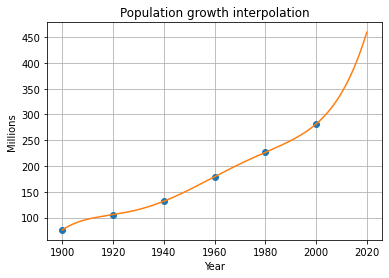

In [ ]:
# plotting given data and the interpolating polynomial

plt.plot(x,y, 'o', label = 'data')
newx = np.arange(0, 120, 0.01)
p = lag(x,y)
plt.xticks(ticks = list(range(0,140,20)), labels = range(1900,2040,20))
plt.plot(newx, p(newx), label = 'polynomial')
plt.grid()
plt.xlabel('Year')
plt.ylabel('Millions')
plt.title('Population growth interpolation')

In [ ]:
print('Predicted population value is:', int(p(120)), 'millions')

Predicted population value is: 459 millions


Naturally, the extrapolation using this method is inaccurate, since interpolation performs terribly outside of its domain.

In [ ]:
#fitted polynomial
po(list(p)[::-1])

Polynomial([ 7.60000000e+01,  3.36441667e+00, -1.71072917e-01,  4.82708333e-03,
       -5.26302083e-05,  2.01562500e-07], domain=[-1,  1], window=[-1,  1])

## b)

In [ ]:
# Lagrange polynomial for first 3 datapoints 
po(list(lag(x[0:3], y[0:3]))[::-1])

Polynomial([ 7.6000e+01,  1.5775e+00, -4.6250e-03], domain=[-1,  1], window=[-1,  1])

## c)

In [ ]:
def f(x,y,a,b):
  """
  This function is analogous to divided differences of f[x_a, ... , x_b]

  I am lazy so it does not save the previous f values, thus it is inefficient 
  for large numbers.
  """
  if b != a:
    return ( f(x,y,a+1,b) - f(x,y, a, b-1) ) / (x[b] - x[a])
  else:
    return y[a]

In [ ]:
def newton(x,y):
  """
  This function transforms newton polynom into the standard form using the book
  procedure where p(x) = p(x) * (x-x_j) + a_j, where a_j = f(x,y,0,j)
  """
  p = po(f(x,y,0, len(x)-1))
  for i in range(len(x)-2 , -1, -1):
    p = p*(po((0,1)) - x[i]) + f(x,y,0,i)
  return p

In [ ]:
# newton polynomial of first three data points identical to b)
newton(x[0:3],y[0:3])

Polynomial([ 7.6000e+01,  1.5775e+00, -4.6250e-03], domain=[-1.,  1.], window=[-1.,  1.])

# Problem 2

In [ ]:
def func(x):
  return x**3-2

#using newton polynomial we evaluate

x = np.array([0,1,2])
y = func(x)

print(newton(x,y).roots())
newton(x,y)

[-0.54858377  1.21525044]


Polynomial([-2., -2.,  3.], domain=[-1.,  1.], window=[-1.,  1.])

In [ ]:
# the closest root to x2 is 1.215
print('x3 = ', newton(x,y).roots()[1])

x3 =  1.21525043702153


# Problem 4

## a)

In [ ]:
def func(x):
  return 1/(1+x**2)

x = np.arange(-5,5.1,10/13)
y = func(x)

Text(0.5, 1.0, 'Equidistant points interpolation')

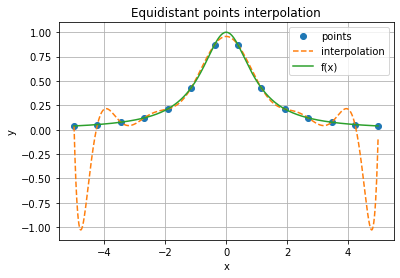

In [ ]:
plt.plot(x,y, 'o', label = 'points')
newx = np.arange(-5, 5, 0.01)
plt.plot(newx,newton(x,y).__call__(newx),'--', label = 'interpolation')
plt.plot(newx, func(newx), label = 'f(x)')
plt.legend()
plt.grid()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Equidistant points interpolation')

## b)

In [ ]:
chebx = 5*np.cos(np.pi*np.arange(0,13)/12)
cheby = func(chebx)

Text(0, 0.5, 'y')

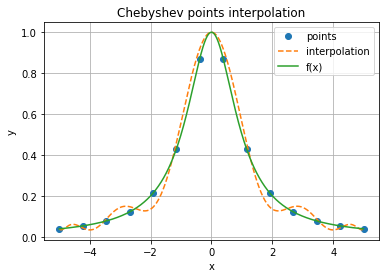

In [ ]:
plt.plot(x,y, 'o', label = 'points')
newx = np.arange(-5, 5, 0.01)
plt.plot(newx,newton(chebx,cheby).__call__(newx),'--', label = 'interpolation')
plt.plot(newx, func(newx), label = 'f(x)')
plt.legend()
plt.grid()
plt.title('Chebyshev points interpolation')
plt.xlabel('x')
plt.ylabel('y')

## c)

In [ ]:
chebx = 5*np.cos(np.pi*np.arange(0,21)/20)
cheby = func(chebx)

Text(0, 0.5, 'y')

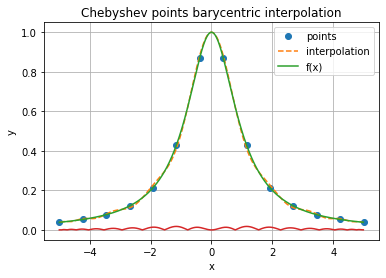

In [ ]:
plt.plot(x,y, 'o', label = 'points')
newx = np.arange(-5, 5, 0.01)
plt.plot(newx,bi(chebx,cheby).__call__(newx),'--', label = 'interpolation')
plt.plot(newx, func(newx), label = 'f(x)')
plt.legend()
plt.grid()
plt.title('Chebyshev points barycentric interpolation')
plt.plot(newx,abs(func(newx) - bi(chebx,cheby).__call__(newx)),'-', label = 'error')
plt.xlabel('x')
plt.ylabel('y')

Text(0, 0.5, 'y')

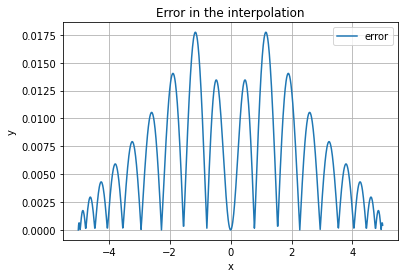

In [ ]:
newx = np.arange(-5, 5, 0.01)
plt.plot(newx,abs(func(newx) - bi(chebx,cheby).__call__(newx)),'-', label = 'error')
plt.legend()
plt.grid()
plt.title('Error in the interpolation')
plt.xlabel('x')
plt.ylabel('y')